# Chapter: Process Fault Detection via Time-Series Pattern Matching


# Topic: Historical Pattern Search

In [10]:
import stumpy, numpy as np, matplotlib.pyplot as plt

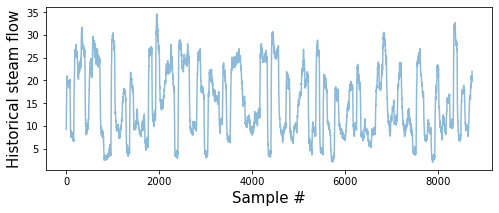

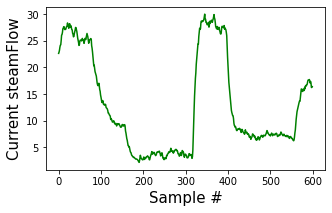

In [11]:
# read data
historical_steamFlow = np.loadtxt('historical_steamFlow.txt')
plt.figure(figsize=(8,3))
plt.plot(historical_steamFlow, alpha=0.5)
plt.ylabel('Historical steam flow', fontsize=15), plt.xlabel('Sample #', fontsize=15)

current_steamFlow = np.loadtxt('current_steamFlow.txt')
plt.figure(figsize=(5,3))
plt.plot(current_steamFlow, color='green')
plt.ylabel('Current steamFlow', fontsize=15), plt.xlabel('Sample #', fontsize=15)

plt.show()

In [3]:
distance_profile = stumpy.mass(current_steamFlow, historical_steamFlow)

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\numba\np\ufunc\parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)


distance_profile provides pairwise distances between current_steamFlow and every subsequence (of the same length as current_steamFlow) within historical_steamFlow. For example, distance_profile[0] gives the Euclidean distance between current_steamFlow and a subsequence of length current_steamFlow.size starting at position 0 in the historical_steamFlow time series.

8125


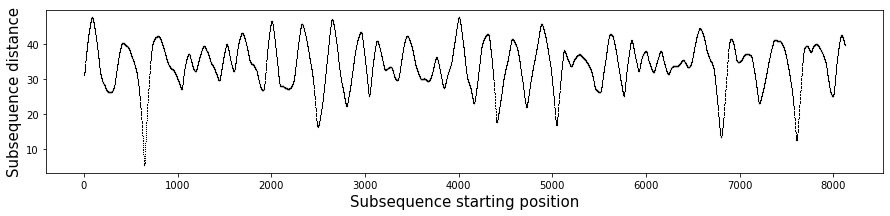

In [4]:
print(distance_profile.size)
plt.figure(figsize=(15,3))
plt.plot(distance_profile, '*', color='black', ms=0.5)
plt.ylabel('Subsequence distance', fontsize=15), plt.xlabel('Subsequence starting position', fontsize=15)
plt.show()

We can notice that in the above plot that a subsequence (with start position between 0 and 1000) exists that is at a much less distance from current_steamFlow than any other subsequence in historical_steamFlow. This most similar subsequence from historical_steamFlow can be obtained by finding the smallest distance in distance_profile and extracting its positional index as shown below.

In [5]:
position = np.argmin(distance_profile)
print('The subsequence most similar to current_steamFlow is located at position :', position)

The subsequence most similar to current_steamFlow is located at position : 643


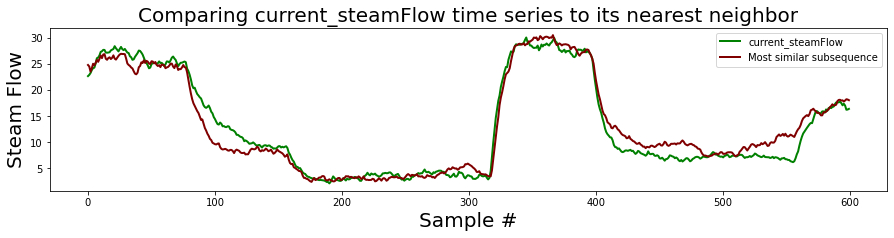

In [13]:
# compare the found pattern to current_steamFlow 
historicalPattern = historical_steamFlow[position:position+len(current_steamFlow)]

plt.figure(figsize=(15,3))
plt.title('Comparing current_steamFlow time series to its nearest neighbor', fontsize='20')
plt.xlabel('Sample #', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(current_steamFlow, lw=2, color="green", label="current_steamFlow")
plt.plot(historicalPattern, lw=2, color="maroon", label="Most similar subsequence")
plt.legend()
plt.show()

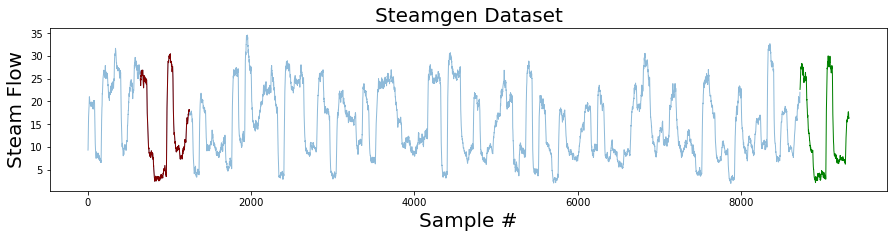

In [16]:
from matplotlib.patches import Rectangle

m = len(current_steamFlow)
plt.figure(figsize=(15,3))
plt.title('Steamgen Dataset', fontsize='20')
plt.ylabel("Steam Flow", fontsize='20'), plt.xlabel('Sample #', fontsize ='20')
plt.plot(historical_steamFlow, alpha=0.5, linewidth=1)
plt.plot(range(position, position+m), historical_steamFlow[position:position+m], color='maroon', linewidth=1)
plt.plot(range(len(historical_steamFlow), len(historical_steamFlow)+m), current_steamFlow, color='green', linewidth=1)
plt.show()